# Import packages

In [1]:
# Import packages - Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import packages for Natural Language Processing
import nltk
import nltk.stem
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Open the data
df=pd.read_csv("un-general-debates.csv")

In [3]:
df.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


# Cleaning

## Processing

In [4]:
# Lowercase
df['text'] = df['text'].str.lower()

# Tokenize, ie. create lists of words
tokenizer = RegexpTokenizer(r'\w+')
df['words']=df['text'].apply(tokenizer.tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['clean_words'] = df['words'].apply(lambda x: [w for w in x if w not in stop_words])

In [5]:
#Example
df['clean_words'][0]

['indeed',
 'pleasure',
 'members',
 'delegation',
 'extend',
 'ambassador',
 'garba',
 'sincere',
 'congratulations',
 'election',
 'presidency',
 'forty',
 'fourth',
 'session',
 'general',
 'assembly',
 'election',
 'high',
 'office',
 'well',
 'deserved',
 'tribute',
 'personal',
 'qualities',
 'experience',
 'fully',
 'confident',
 'able',
 'wise',
 'leadership',
 'assembly',
 'consolidate',
 'gains',
 'achieved',
 'past',
 'year',
 'delegation',
 'associates',
 'previous',
 'speakers',
 'expressing',
 'appreciation',
 'dedicated',
 'efforts',
 'predecessor',
 'excellency',
 'mr',
 'dante',
 'caputo',
 'exemplary',
 'manner',
 'discharged',
 'duties',
 'president',
 'forty',
 'third',
 'session',
 'general',
 'assembly',
 'previous',
 'years',
 'delegation',
 'wishes',
 'note',
 'satisfaction',
 'gratitude',
 'assiduous',
 'unrelenting',
 'efforts',
 'exerted',
 'secretary',
 'general',
 'united',
 'nations',
 'cause',
 'peace',
 'international',
 'harmony',
 'pay',
 'tribute',
 '

## Dataframes for different countries

In [44]:
# Permanent members of the Council
members = ['FRA', 'GBR', 'USA', 'CHN', 'RUS']
df_members = df[df['country'].isin(members)]

df_members_countries = []
for member in members :
    df_members_countries.append(df[df['country'] == member])

In [119]:
df_by_countries = df_members.groupby('country').agg({'clean_words': 'sum'})
#df_by_countries.reset_index(inplace=True)

## NLP

### Word frequencies

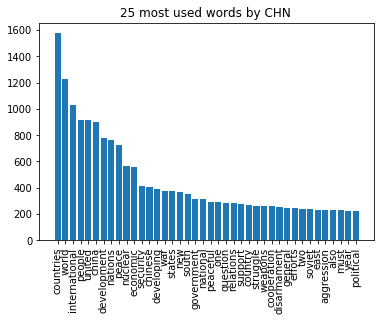

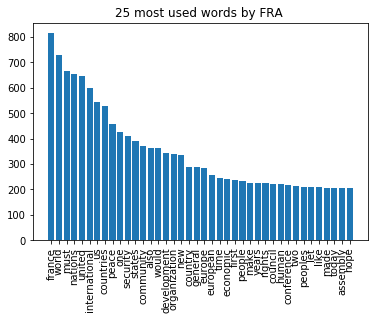

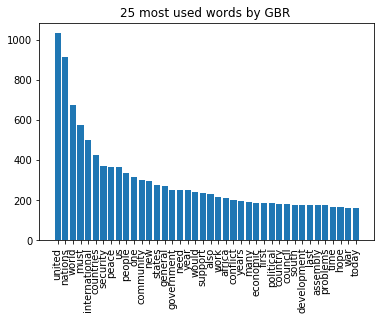

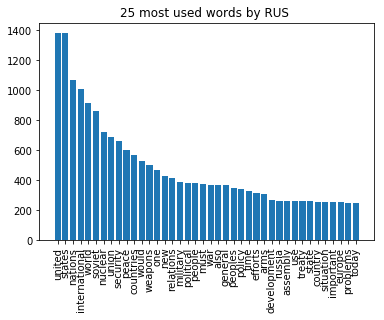

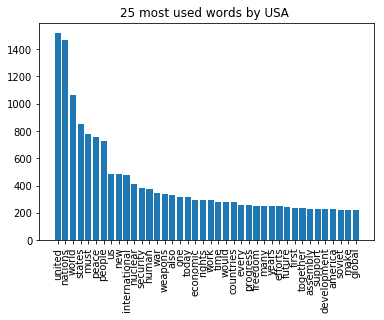

In [120]:
# Most used words by country: quite similar
for i, row in df_by_countries.iterrows():
    freq = dict(nltk.FreqDist(row['clean_words']))
    sort_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[0:40]
    plt.bar(range(len(sort_freq)), [val[1] for val in sort_freq], align='center')
    plt.xticks(range(len(sort_freq)), [val[0] for val in sort_freq])
    plt.xticks(rotation=90)
    plt.title("25 most used words by %s " % str(i))
    plt.show()

In [208]:
sort_freq[1][0]

'france'

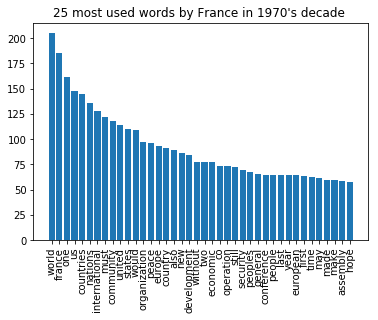

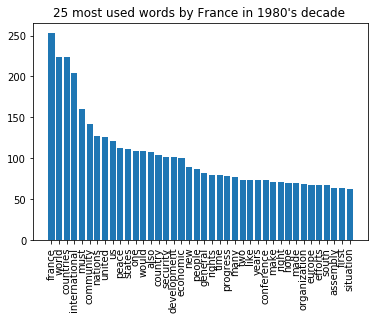

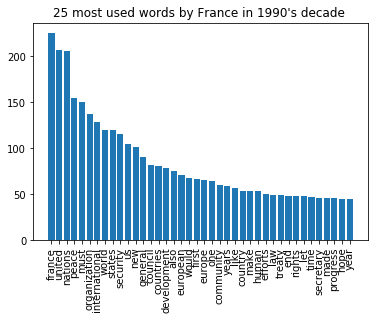

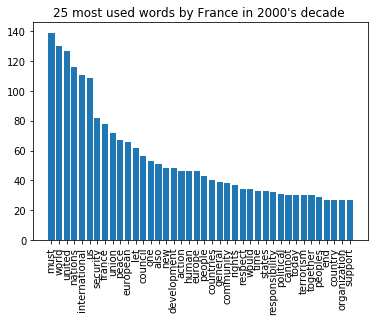

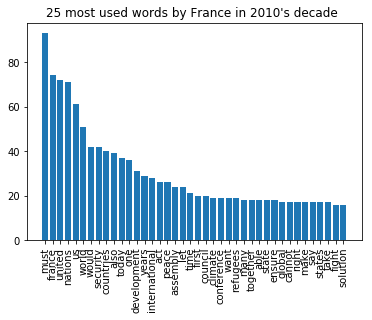

In [204]:
#Evolution over time in France, by decade
df_france_decade = df_france.groupby((df_france.year//10)*10).agg({'clean_words': 'sum'}).sort_values(by=['year'])
for i, row in df_france_decade.iterrows():
    freq = dict(nltk.FreqDist(row['clean_words']))
    sort_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)[0:40]
    #sort_freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)[0:40]}
    #print(sort_freq.keys())
    plt.bar(range(len(sort_freq)), [val[1] for val in sort_freq], align='center')
    plt.xticks(range(len(sort_freq)), [val[0] for val in sort_freq])
    plt.xticks(rotation=90)
    plt.title("25 most used words by France in %s's decade " % str(i))
    plt.show()
    
# at first
#over time, apperance of words such as terrorism, 

In [ ]:
#Evolution of words that are always important  world, france, countries, national, international, peace, development
#Important before :, european
# Important now: security, treaty, human

In [74]:
all_words = []
df_france.clean_words.apply(lambda l : all_words.extend(l))

74      None
176     None
300     None
446     None
643     None
767     None
966     None
1106    None
1256    None
1456    None
1559    None
1827    None
2025    None
2204    None
2281    None
2461    None
2567    None
2777    None
2952    None
3062    None
3209    None
3441    None
3489    None
3653    None
3832    None
4031    None
4207    None
4334    None
4608    None
4766    None
4860    None
5161    None
5303    None
5450    None
5724    None
5778    None
5973    None
6044    None
6307    None
6431    None
6556    None
6735    None
6909    None
7030    None
7180    None
7381    None
Name: clean_words, dtype: object

In [82]:
lala

FreqDist({'france': 815, 'world': 730, 'must': 664, 'nations': 655, 'united': 646, 'international': 599, 'us': 543, 'countries': 530, 'peace': 456, 'one': 424, ...})

<FreqDist with 8807 samples and 85188 outcomes>
speaking:27
behalf:53
european:258
economic:242
community:370
mr:106
president:157
allow:50
turn:49
extend:12
member:88
states:392
congratulations:11
election:27
office:15
general:288
assembly:205
experience:28
international:599
affairs:37
united:646
nations:655
system:82
particularly:80
important:109
doubt:20
enable:40
work:161
let:208
also:362
include:20
tribute:66
head:18
energy:68
entire:52
organization:341
like:208
twelve:44
assure:15
secretary:137
support:126
task:63
express:47
activity:15
throughout:35
world:730
favour:23
peace:456
always:49
considered:17
special:94
contribution:60
make:226
efforts:197
made:207
build:46
peaceful:56
bound:14
ever:68
closer:22
ties:44
solidarity:111
put:83
forward:41
main:51
external:17
action:183
common:93
struggle:27
development:343
fight:67
societies:14
human:221
rights:225
violations:29
terrorism:73
drug:18
first:238
say:109
words:46
hopes:72
developments:18
year:176
gone:12
progress:202
still:16

dangerous:21
environmental:18
agency:19
actions:52
issues:29
growing:40
commitment:61
threats:44
keep:13
silent:12
mankind:40
unfortunately:26
continents:17
trying:12
events:35
show:21
china:21
instruments:22
freely:22
expression:21
giving:27
crisis:123
regime:34
currently:19
legitimacy:20
asked:19
change:59
southern:32
emergency:13
ban:19
organizations:52
starting:16
pressure:14
modern:13
emergence:17
legal:14
authority:50
merely:14
man:37
march:11
commission:21
draft:18
protocol:19
death:16
child:12
permit:11
adopt:21
consensus:13
practices:11
whatever:33
circumstances:23
firm:11
response:31
borders:29
increased:30
agencies:19
responsible:21
public:35
order:167
challenge:25
mentioned:18
scourge:17
tragic:29
month:15
drugs:11
gives:20
regional:104
context:39
involving:13
contributed:15
20:23
december:14
active:28
participation:24
keeping:47
operations:42
undertaken:18
communities:24
capacity:26
honour:16
eyes:11
identity:27
grow:11
defence:15
total:15
earth:18
chosen:12
2000:11
faced:

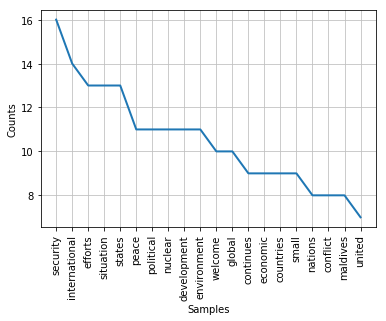

In [81]:
lala=nltk.FreqDist(all_words)
print(lala)
for key,val in lala.items():
    if val>10 :
        print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [76]:
len(all_words)

85188

In [68]:
sum(df_france['clean_words'])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [67]:
sum(row['clean_words'] for row in df_france)

TypeError: string indices must be integers

In [49]:
df['most_freq_words'] = []
for key, val in df['freq'].items() :
    if val>10 :
        df['most_freq_words'].append(str(key))

ValueError: Length of values does not match length of index

In [48]:
for key,val in freq.items():
    if val>10 :
        print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

7       {'task': 1, 'head': 2, 'delegation': 1, 'sovie...
8       {'permit': 1, 'begin': 1, 'warmly': 1, 'congra...
74      {'speaking': 1, 'behalf': 8, 'european': 15, '...
81      {'let': 2, 'first': 10, 'sir': 1, 'add': 1, 'c...
124     {'honoured': 1, 'address': 1, 'general': 7, 'a...
161     {'1': 4, 'privilege': 1, 'extend': 1, 'warm': ...
176     {'84': 1, 'within': 1, 'one': 22, 'month': 3, ...
207     {'110': 1, 'mr': 5, 'president': 3, 'like': 3,...
243     {'year': 2, 'unusual': 1, 'one': 2, 'china': 4...
300     {'honour': 4, 'united': 12, 'nations': 10, 'ac...
366     {'international': 11, 'relations': 2, 'becomin...
376     {'lifetime': 1, 'world': 14, 'sliced': 1, 'lab...
405     {'year': 5, 'come': 4, 'together': 4, 'reaffir...
438     {'let': 1, 'first': 4, 'join': 1, 'congratulat...
442     {'outset': 1, 'like': 2, 'warmly': 1, 'congrat...
446     {'like': 10, 'first': 8, 'congratulate': 1, 'p...
522     {'sir': 1, 'permit': 2, 'first': 7, 'congratul...
548     {'let'

efforts:13
peace:11
international:14
political:11
situation:13
security:16
nuclear:11
development:11
environment:11
states:13


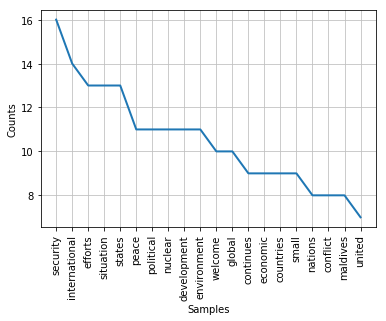

In [18]:
for key,val in freq.items():
    if val>10 :
        print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [6]:
# Create 500 TF-IDF features, using 2-gram
num_features = 500
tfidf = TfidfVectorizer(max_features = num_features, strip_accents='unicode',
                        lowercase=True, stop_words='english', ngram_range=(1,2))
print('Fitting Data...')
tfidf.fit(df['text'].values.astype('U'))

print('Starting Transform...')
text_tfidf = tfidf.transform(df['text'])

print('Label and Incorporate TF-IDF...')
data_array = pd.DataFrame(text_tfidf.toarray())
feature_names = tfidf.get_feature_names()

for i in range(num_features):
    feature_names[i] = 'TF_' + feature_names[i]

Fitting Data...
Starting Transform...
Label and Incorporate TF-IDF...


In [7]:
data_array.columns = feature_names
df = pd.concat([df, data_array], axis=1)